# Peter og ulven: Innføring i forsterkende læring

I denne veiledningen skal vi lære hvordan vi kan bruke forsterkende læring på et problem med å finne veier. Settingen er inspirert av [Peter og ulven](https://en.wikipedia.org/wiki/Peter_and_the_Wolf), et musikalsk eventyr av den russiske komponisten [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Det er en historie om den unge pioneren Peter, som modig går ut av huset sitt til lysningen i skogen for å jage en ulv. Vi skal trene maskinlæringsalgoritmer som vil hjelpe Peter med å utforske området rundt og lage et optimalt navigasjonskart.

Først, la oss importere en rekke nyttige biblioteker:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Oversikt over Forsterkende Læring

**Forsterkende Læring** (RL) er en læringsteknikk som lar oss lære en optimal oppførsel for en **agent** i et **miljø** ved å utføre mange eksperimenter. En agent i dette miljøet bør ha et **mål**, definert av en **belønningsfunksjon**.

## Miljøet

For enkelhets skyld, la oss anta at Peters verden er et kvadratisk brett med størrelse `width` x `height`. Hver celle på dette brettet kan enten være:
* **bakke**, som Peter og andre skapninger kan gå på
* **vann**, som man åpenbart ikke kan gå på
* **et tre** eller **gress** - et sted hvor man kan hvile
* **et eple**, som representerer noe Peter gjerne vil finne for å mate seg selv
* **en ulv**, som er farlig og bør unngås

For å arbeide med miljøet, vil vi definere en klasse kalt `Board`. For å unngå å gjøre denne notatboken for rotete, har vi flyttet all kode for å arbeide med brettet til en separat modul kalt `rlboard`, som vi nå skal importere. Du kan se inn i denne modulen for å få mer detaljer om implementasjonens interne funksjoner.


La oss nå lage et tilfeldig brett og se hvordan det ser ut:


In [4]:
# code block 1

## Handlinger og Policy

I vårt eksempel vil Peters mål være å finne et eple, samtidig som han unngår ulven og andre hindringer. Definer disse handlingene som en ordbok, og koble dem til par av tilsvarende koordinatendringer.


In [5]:
# code block 2

Strategien til agenten vår (Peter) er definert av en såkalt **policy**. La oss se på den enkleste policyen, kalt **tilfeldig vandring**.

## Tilfeldig vandring

La oss først løse problemet vårt ved å implementere en strategi for tilfeldig vandring.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Belønningsfunksjon

For å gjøre vår policy mer intelligent, må vi forstå hvilke trekk som er "bedre" enn andre.


In [8]:
#code block 5

## Q-Læring

Bygg en Q-Tabell, eller et flerdimensjonalt array. Siden brettet vårt har dimensjonene `bredde` x `høyde`, kan vi representere Q-Tabellen med et numpy-array med formen `bredde` x `høyde` x `len(actions)`:


In [9]:
# code block 6

Pass Q-Tabellen til `plot`-funksjonen for å visualisere tabellen på brettet:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essensen av Q-Læring: Bellman-likningen og læringsalgoritmen

Skriv en pseudokode for læringsalgoritmen vår:

* Initialiser Q-Tabellen Q med like verdier for alle tilstander og handlinger
* Sett læringsraten $\alpha\leftarrow 1$
* Gjenta simuleringen mange ganger
   1. Start på en tilfeldig posisjon
   1. Gjenta
        1. Velg en handling $a$ i tilstand $s$
        2. Utfør handlingen ved å gå til en ny tilstand $s'$
        3. Hvis vi møter en sluttspillbetingelse, eller den totale belønningen er for liten - avslutt simuleringen  
        4. Beregn belønningen $r$ i den nye tilstanden
        5. Oppdater Q-funksjonen i henhold til Bellman-likningen: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Oppdater total belønning og reduser $\alpha$.

## Utforske vs. Utnytte

Den beste tilnærmingen er å balansere mellom utforsking og utnyttelse. Etter hvert som vi lærer mer om miljøet vårt, vil vi være mer tilbøyelige til å følge den optimale ruten, men samtidig velge den uutforskede veien av og til.

## Python-implementasjon

Nå er vi klare til å implementere læringsalgoritmen. Før det trenger vi også en funksjon som kan konvertere vilkårlige tall i Q-Tabellen til en sannsynlighetsvektor for de tilsvarende handlingene:


In [10]:
# code block 7

Vi legger til en liten mengde `eps` til den opprinnelige vektoren for å unngå divisjon med 0 i det innledende tilfellet, når alle komponentene i vektoren er identiske.

Den faktiske læringsalgoritmen vi skal kjøre i 5000 eksperimenter, også kalt **epoker**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Etter å ha utført denne algoritmen, bør Q-Tabellen oppdateres med verdier som definerer attraktiviteten til forskjellige handlinger på hvert trinn. Visualiser tabellen her:


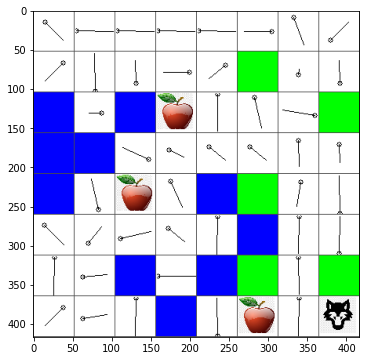

In [43]:
m.plot(Q)

## Sjekke policyen

Siden Q-Tabellen viser "attraktiviteten" til hver handling i hver tilstand, er det ganske enkelt å bruke den til å definere effektiv navigasjon i vår verden. I det enkleste tilfellet kan vi bare velge handlingen som tilsvarer den høyeste verdien i Q-Tabellen:


In [13]:
# code block 9

2

Hvis du prøver koden ovenfor flere ganger, kan du legge merke til at den noen ganger bare "henger", og du må trykke på STOPP-knappen i notatboken for å avbryte den.

> **Oppgave 1:** Endre `walk`-funksjonen slik at den begrenser maksimal lengde på stien til et visst antall steg (for eksempel 100), og se hvordan koden ovenfor returnerer denne verdien fra tid til annen.

> **Oppgave 2:** Endre `walk`-funksjonen slik at den ikke går tilbake til steder den allerede har vært tidligere. Dette vil forhindre at `walk` går i løkker, men agenten kan fortsatt ende opp med å bli "fanget" på et sted den ikke kan komme seg ut fra.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


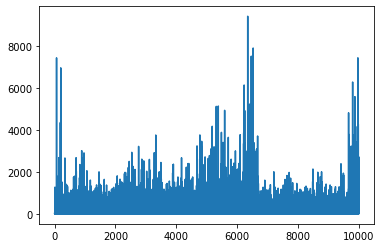

In [57]:
plt.plot(lpath)

## Øvelse
## En mer realistisk verden for Peter og ulven



---

**Ansvarsfraskrivelse**:  
Dette dokumentet er oversatt ved hjelp av AI-oversettelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selv om vi streber etter nøyaktighet, vær oppmerksom på at automatiske oversettelser kan inneholde feil eller unøyaktigheter. Det originale dokumentet på sitt opprinnelige språk bør anses som den autoritative kilden. For kritisk informasjon anbefales profesjonell menneskelig oversettelse. Vi er ikke ansvarlige for eventuelle misforståelser eller feiltolkninger som oppstår ved bruk av denne oversettelsen.
